In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns; sns.set()
from qbstyles import mpl_style
from datetime import datetime as dt

In [107]:
!mkdir "csv"
# Todo reminder here that you could also use the dt.today() funtion
dateRange = pd.date_range('04-12-2020', '08-13-2021')
for date in dateRange:
    datestr = date.strftime('%m-%d-%Y')
    !curl {"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/" + datestr + ".csv"} -o {"csv/" + datestr + ".csv"}
    

 Left  Speed
100  542k  100  542k    0     0   9.8M      0 --:--:-- --:--:-- --:--:--  9.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  542k  100  542k    0     0  5959k      0 --:--:-- --:--:-- --:--:-- 5959k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  542k  100  542k    0     0  7861k      0 --:--:-- --:--:-- --:--:-- 7861k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  542k  100  542k    0     0  5479k      0 --:--:-- --:--:-- --:--:-- 5479k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  542k  100  542k    0     0  9353k 

In [190]:
# Starting with US first
dateRange = pd.date_range('04-12-2020', '08-13-2021')
us_data, pa_data, mont_data = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
for date in dateRange:
    df = pd.read_csv('csv/' + date.strftime('%m-%d-%Y') + '.csv')[['FIPS','Province_State','Country_Region','Confirmed']]
    us_df = df.query('Country_Region == "US"')
    us_df = us_df.groupby('Country_Region').aggregate({'FIPS':max,
                                            'Province_State':max,
                                            'Confirmed':sum})

    pa_df = df.query('Country_Region == "US" and Province_State == "Pennsylvania"')
    pa_df = pa_df.groupby('Province_State').aggregate({'FIPS':max,
                                            'Country_Region':max,
                                            'Confirmed':sum})
    mont_df = df.query('FIPS == 42091') # Code for PA Montgom County
    if us_data.empty:
        us_data = us_df
        pa_data = pa_df
        mont_data = mont_df      
    else:
        us_data = pd.concat((us_data,us_df), ignore_index=True)
        pa_data = pd.concat((pa_data,pa_df), ignore_index=True)
        mont_data = pd.concat((mont_data,mont_df), ignore_index=True)

us_data.index = dateRange; pa_data.index = dateRange; mont_data.index = dateRange


In [191]:
us_data = us_data[['Confirmed']]; pa_data = pa_data[['Confirmed']]; mont_data = mont_data[['Confirmed']]

for data_set in [us_data, pa_data, mont_data]:
    prev = 0
    new_cases = []
    for row in data_set.iterrows():        
        ind = row[1].loc['Confirmed']
        new_cases.append(ind - prev)
        prev = ind
    data_set['New_Cases'] = pd.DataFrame({'New_Cases':new_cases}, index=dateRange)

# The first of the Cases Per Day should be 0 since that is our starting point
us_data.loc['04-12-2020','New_Cases'] = 0; pa_data.loc['04-12-2020','New_Cases'] = 0; mont_data.loc['04-12-2020','New_Cases'] = 0
mont_data

,Confirmed,New_Cases
2020-04-12,2164,0
2020-04-13,2285,121
2020-04-14,2354,69
2020-04-15,2475,121
2020-04-16,2544,69
...,...,...
2021-08-09,72313,212
2021-08-10,72435,122
2021-08-11,72528,93
2021-08-12,72653,125


In [223]:
us_data['Dates'] = pd.to_datetime(us_data.index.strftime('%b-%d-%Y'))

### There's something about setting the epoch, I dont know anymore

[Text(-30.0, 0, ''),
 Text(0.0, 0, '2020-04-12T00:00:00.000000000'),
 Text(30.0, 0, '2020-05-12T00:00:00.000000000'),
 Text(60.0, 0, '2020-06-11T00:00:00.000000000'),
 Text(90.0, 0, '2020-07-11T00:00:00.000000000'),
 Text(120.0, 0, '2020-08-10T00:00:00.000000000'),
 Text(150.0, 0, '2020-09-09T00:00:00.000000000'),
 Text(180.0, 0, '2020-10-09T00:00:00.000000000'),
 Text(210.0, 0, '2020-11-08T00:00:00.000000000'),
 Text(240.0, 0, '2020-12-08T00:00:00.000000000'),
 Text(270.0, 0, '2021-01-07T00:00:00.000000000'),
 Text(300.0, 0, '2021-02-06T00:00:00.000000000'),
 Text(330.0, 0, '2021-03-08T00:00:00.000000000'),
 Text(360.0, 0, '2021-04-07T00:00:00.000000000'),
 Text(390.0, 0, '2021-05-07T00:00:00.000000000'),
 Text(420.0, 0, '2021-06-06T00:00:00.000000000'),
 Text(450.0, 0, '2021-07-06T00:00:00.000000000'),
 Text(480.0, 0, '2021-08-05T00:00:00.000000000'),
 Text(510.0, 0, '')]

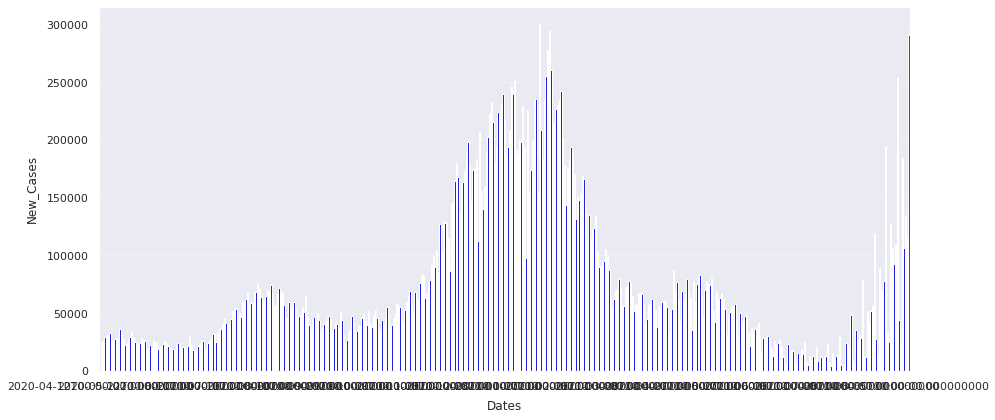

In [228]:
# pa_data.plot.bar(y='New_Cases', xticks=[], figsize=(11,5))
# us_data.plot(y='New_Cases', figsize=(11,5))
# mpl_style(dark=True)
sns.set()

# dates = pd.to_datetime(us_data.index.strftime('%b-%d-%Y'))
# us_data = us_data.reset_index()

fig,ax = plt.subplots(figsize=(14,6))
sns.barplot(x='Dates', y='New_Cases', data=us_data, color='blue',ax=ax, dodge=False)
ax.xaxis.set_major_locator(plt.MaxNLocator(17))
# x = pd.date_range('04-01-2020', periods=17, freq='m')
# ax.set_xticks(x)
# ax.set_xticklabels([i.strftime('%b-%y') for i in x])

# date_form = DateFormatter("%m-%d")
# ax.xaxis.set_major_formatter(date_form)
fig.tight_layout()
ax.get_xticklabels()


# dt.strptime(str(ax.get_xticklabels()[1]),"%Y-%m-%d")
# a = dt.strptime(ax.get_xticklabels()[1])
# a
# us_data.plot.bar(y='New_Cases', figsize=(14,6))
# ax = plt.gca()


In [214]:
x = pd.date_range('04-01-2020', periods=17, freq='m')
[i.strftime('%b-%y') for i in x]

['Apr-20',
 'May-20',
 'Jun-20',
 'Jul-20',
 'Aug-20',
 'Sep-20',
 'Oct-20',
 'Nov-20',
 'Dec-20',
 'Jan-21',
 'Feb-21',
 'Mar-21',
 'Apr-21',
 'May-21',
 'Jun-21',
 'Jul-21',
 'Aug-21']